#190494A

#Ranasinghe K K H

#1

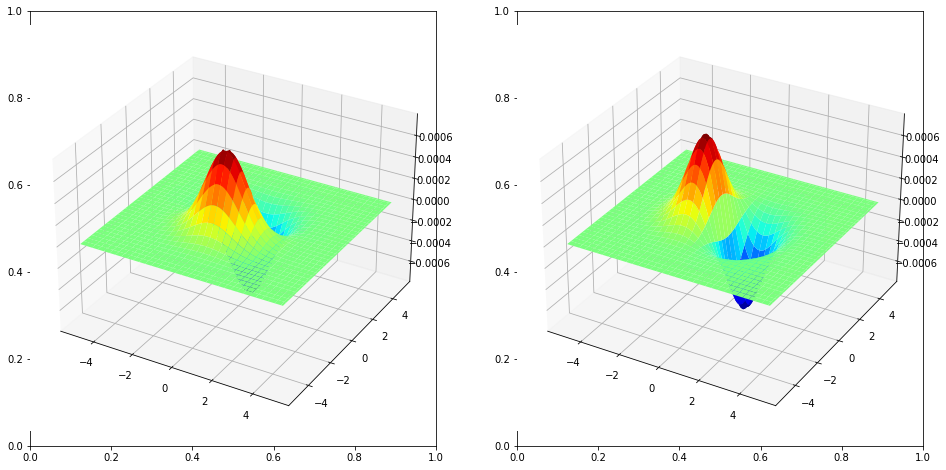

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

sigma =1
delta=0.1
x = np.arange(-5,5+delta,delta)
y = np.arange(-5,5+delta,delta)
X, Y = np.meshgrid(x,y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))
Z= Z/np.sum(Z)
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float64)
zx= cv.filter2D(Z,-1,kernel)
kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float64)
zy= cv.filter2D(Z,-1,kernel)

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1 = fig.add_subplot(121,projection = '3d')
ax2 = fig.add_subplot(122,projection='3d')
surf1 = ax1.plot_surface(X,Y,zx,cmap=cm.jet)
surf2 = ax2.plot_surface(X,Y,zy,cmap=cm.jet)

#cset = ax1.contourf(X,Y,zx,zdir='z',offset=np.min(zx)-1.5,cmap=cm.jet)
#ax1.set_zlim(np.min(zx)-2,np.max(zx))
#cset2 = ax2.contourf(X,Y,zy,zdir='z',offset=np.min(zx)-1.5,cmap=cm.jet)
#ax2.set_zlim(np.min(zy)-2,np.max(zy))
plt.show()





#2

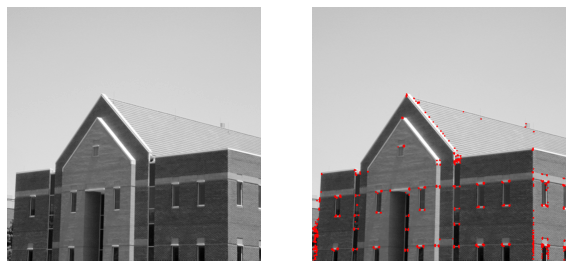

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


img=cv.imread("building.tif")
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray=np.float32(gray)
dst=cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)

harrisCorners=img
harrisCorners[dst>0.01*dst.max()]=[255,0,0]
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(gray,cmap='gray')
ax[0].axis('off')
ax[1].imshow(harrisCorners)
ax[1].axis('off')
plt.show()


In [ ]:
#3

#4

(-0.5, 599.5, 599.5, -0.5)

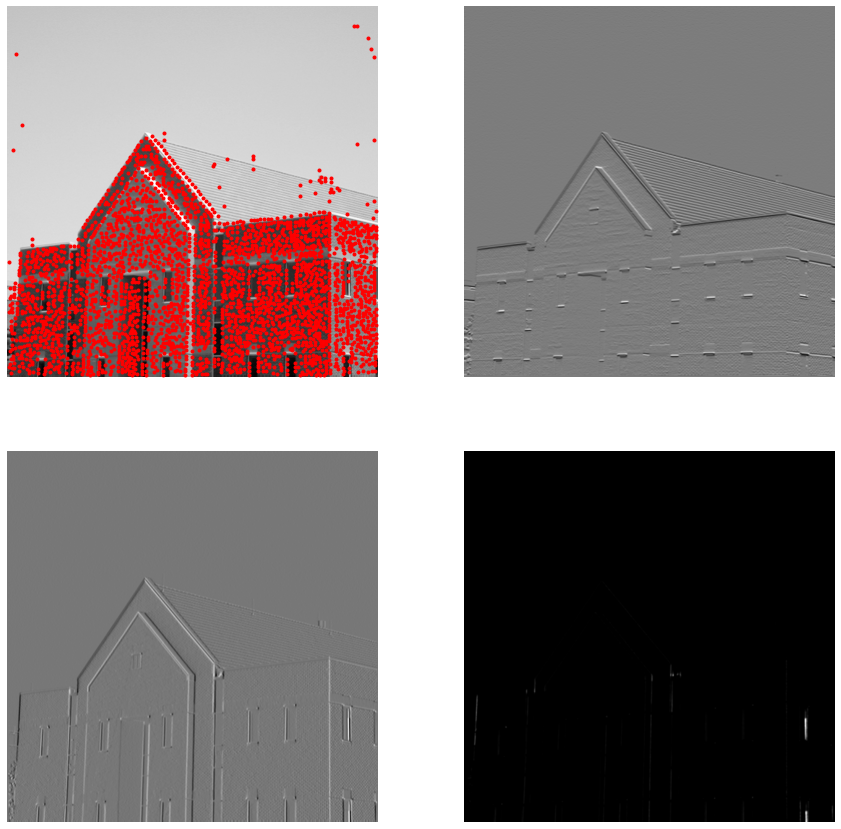

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
im= cv.imread("building.tif",cv.IMREAD_COLOR)
from skimage.feature import peak_local_max

I = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
I=np.float32(I)

sobel_V = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float64)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float64)

Ix = cv.filter2D(I,-1,sobel_V)
Iy =cv.filter2D(I,-1,sobel_h)

ksize = 3
sigma = 1
m11=cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12=cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m21=m12
m22=m11=cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)

det = m11*m22 -m12*m21
trace = m11+m22
alpha = 0.04
R = det-alpha*trace**2
R[ R<1e4] =0
coordinates = peak_local_max(R,min_distance=2)

fig,ax=plt.subplots(2,2,figsize=(15,15))
ax[0,0].imshow(im,cmap='gray')
ax[0,0].plot(coordinates[:,1],coordinates[:,0],'r.')
ax[0,0].axis('off')
ax[0,1].imshow(Ix+127,cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(Iy+127,cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(R+127,cmap='gray')
ax[1,1].axis('off')




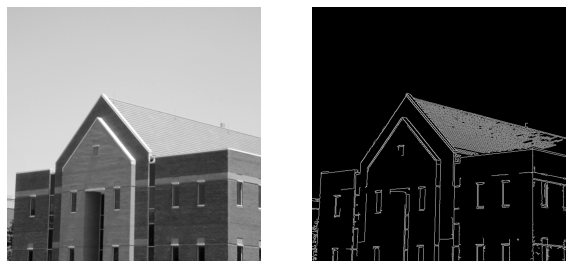

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
img = cv.imread("building.tif",cv.IMREAD_GRAYSCALE)
highThreshold = 200
lowThreshold = 100
imgCanny=cv.Canny(img,lowThreshold,highThreshold)

fig , ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img , cmap='gray')
ax[1].imshow(imgCanny,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
plt.show()